In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("train.csv.crdownload")
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [ ]:
df = df.drop(['PdDistrict', 'Address', 'Resolution', 'Descript', 'DayOfWeek'], axis = 1) # axis = 1 for column drop, 0 for row drop..


In [ ]:
df.tail(5)

,Dates,Category,X,Y
288985,2011-06-01 12:00:00,OTHER OFFENSES,-122.477896,37.775648
288986,2011-06-01 12:00:00,FRAUD,-122.444170,37.777113
288987,2011-06-01 12:00:00,SUSPICIOUS OCC,-122.451933,37.764646
288988,2011-06-01 12:00:00,BURGLARY,-122.386955,37.733692
288989,2011-06-01 12:00:00,OTHER OFFENSES,NaN,NaN


In [ ]:
df.isnull().sum()

Dates       0
Category    0
X           1
Y           1
dtype: int64

In [ ]:
f = lambda x: (x["Dates"].split())[0] 
df["Dates"] = df.apply(f, axis=1)
df.head()

,Dates,Category,X,Y
0,2015-05-13,WARRANTS,-122.425892,37.774599
1,2015-05-13,OTHER OFFENSES,-122.425892,37.774599
2,2015-05-13,OTHER OFFENSES,-122.424363,37.800414
3,2015-05-13,LARCENY/THEFT,-122.426995,37.800873
4,2015-05-13,LARCENY/THEFT,-122.438738,37.771541


In [ ]:
f = lambda x: (x["Dates"].split('-'))[0] 
df["Dates"] = df.apply(f, axis=1)
df.head()

,Dates,Category,X,Y
0,2015,WARRANTS,-122.425892,37.774599
1,2015,OTHER OFFENSES,-122.425892,37.774599
2,2015,OTHER OFFENSES,-122.424363,37.800414
3,2015,LARCENY/THEFT,-122.426995,37.800873
4,2015,LARCENY/THEFT,-122.438738,37.771541


In [ ]:
df.tail()

,Dates,Category,X,Y
288985,2011,OTHER OFFENSES,-122.477896,37.775648
288986,2011,FRAUD,-122.444170,37.777113
288987,2011,SUSPICIOUS OCC,-122.451933,37.764646
288988,2011,BURGLARY,-122.386955,37.733692
288989,2011,OTHER OFFENSES,NaN,NaN


In [ ]:
# Categorize dataset by year otherwise too long to process.. 
# We will use only year 2014 values for this project, but you can change this easily if you want..
df_2014 = df[(df.Dates == '2014')]
df_2014.head()


,Dates,Category,X,Y
27584,2014,LARCENY/THEFT,-122.435563,37.760801
27585,2014,LARCENY/THEFT,-122.433575,37.800037
27586,2014,VEHICLE THEFT,-122.412777,37.786834
27587,2014,ASSAULT,-122.421702,37.773641
27588,2014,ASSAULT,-122.421702,37.773641


In [ ]:
df_2014.tail()

,Dates,Category,X,Y
102345,2014,OTHER OFFENSES,-122.387235,37.719401
102346,2014,WARRANTS,-122.387235,37.719401
102347,2014,FRAUD,-122.418382,37.783258
102348,2014,NON-CRIMINAL,-122.413652,37.728320
102349,2014,FRAUD,-122.408563,37.797007


In [18]:
scaler = MinMaxScaler()

scaler.fit(df_2014[['X']])
df_2014['X_scaled'] = scaler.transform(df_2014[['X']]) 

scaler.fit(df_2014[['Y']])
df_2014['Y_scaled'] = scaler.transform(df_2014[['Y']])


C:\Users\zelih\AppData\Local\Temp\ipykernel_6116\2555501096.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2014['X_scaled'] = scaler.transform(df_2014[['X']])
C:\Users\zelih\AppData\Local\Temp\ipykernel_6116\2555501096.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2014['Y_scaled'] = scaler.transform(df_2014[['Y']])


In [19]:
df_2014.head()

,Dates,Category,X,Y,X_scaled,Y_scaled
27584,2014,LARCENY/THEFT,-122.435563,37.760801,0.526134,0.471397
27585,2014,LARCENY/THEFT,-122.433575,37.800037,0.539528,0.821894
27586,2014,VEHICLE THEFT,-122.412777,37.786834,0.679676,0.703952
27587,2014,ASSAULT,-122.421702,37.773641,0.619540,0.586098
27588,2014,ASSAULT,-122.421702,37.773641,0.619540,0.586098


In [20]:
k_range = range(1,15)

list_dist = []

for k in k_range:
    model = KMeans(n_clusters=k)
    model.fit(df_2014[['X_scaled','Y_scaled']])
    list_dist.append(model.inertia_)

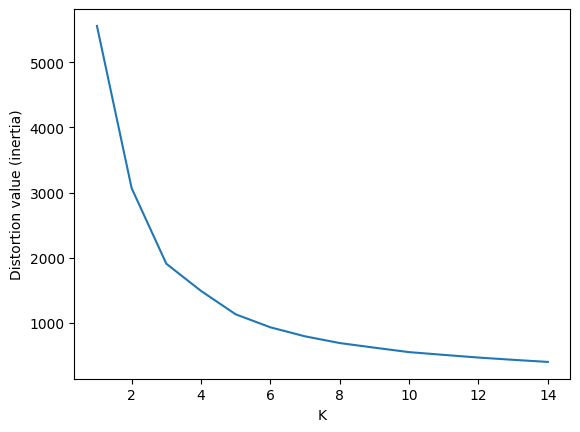

In [21]:
from matplotlib import pyplot as plt

plt.xlabel('K')
plt.ylabel('Distortion value (inertia)')
plt.plot(k_range,list_dist)
plt.show()

In [22]:

model = KMeans(n_clusters=5)
y_predicted = model.fit_predict(df_2014[['X_scaled','Y_scaled']])
y_predicted

array([0, 4, 4, ..., 4, 3, 4])

In [23]:
df_2014['cluster'] = y_predicted
df_2014

C:\Users\zelih\AppData\Local\Temp\ipykernel_6116\1025803174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2014['cluster'] = y_predicted


,Dates,Category,X,Y,X_scaled,Y_scaled,cluster
27584,2014,LARCENY/THEFT,-122.435563,37.760801,0.526134,0.471397,0
27585,2014,LARCENY/THEFT,-122.433575,37.800037,0.539528,0.821894,4
27586,2014,VEHICLE THEFT,-122.412777,37.786834,0.679676,0.703952,4
27587,2014,ASSAULT,-122.421702,37.773641,0.619540,0.586098,0
27588,2014,ASSAULT,-122.421702,37.773641,0.619540,0.586098,0
...,...,...,...,...,...,...,...
102345,2014,OTHER OFFENSES,-122.387235,37.719401,0.851793,0.101571,3
102346,2014,WARRANTS,-122.387235,37.719401,0.851793,0.101571,3
102347,2014,FRAUD,-122.418382,37.783258,0.641908,0.672007,4
102348,2014,NON-CRIMINAL,-122.413652,37.728320,0.673778,0.181249,3


In [25]:
import plotly.express as px   # You can install plotly module with: "conda install plotly" in Anaconda prompt.. 

In [31]:
# Don't forget Y is latiutude and X is longitude...
figure = px.scatter_mapbox(df_2014, lat='Y', lon='X',                       
                       center = dict(lat = 37.8, lon = -122.4), # This is the coordinate of San Francisco..
                       zoom = 9,                                # Zoom of the map
                       opacity = .9,                            # opacity of the map a value between 0 and 1..
                       mapbox_style = 'stamen-terrain',         # basemap 
                       color = 'cluster',                       # Map will draw scatter colors according to cluster number..
                       title = 'San Francisco Crime Districts',
                       width = 1100,
                       height = 700,                     
                       hover_data = ['cluster', 'Category', 'Y', 'X']
                       )

figure.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [32]:
import plotly
plotly.offline.plot(figure, filename = 'maptest.html', auto_open = True)

'maptest.html'

In [33]:
# if you want to use another basemap or use other methods of plotly you can get info using help(px.scatter_mapbox):
help(px.scatter_mapbox)

Help on function scatter_mapbox in module plotly.express._chart_types:

scatter_mapbox(data_frame=None, lat=None, lon=None, color=None, text=None, hover_name=None, hover_data=None, custom_data=None, size=None, animation_frame=None, animation_group=None, category_orders=None, labels=None, color_discrete_sequence=None, color_discrete_map=None, color_continuous_scale=None, range_color=None, color_continuous_midpoint=None, opacity=None, size_max=None, zoom=8, center=None, mapbox_style=None, title=None, template=None, width=None, height=None) -> plotly.graph_objs._figure.Figure
        In a Mapbox scatter plot, each row of `data_frame` is represented by a
        symbol mark on a Mapbox map.
        
    Parameters
    ----------
    data_frame: DataFrame or array-like or dict
        This argument needs to be passed for column names (and not keyword
        names) to be used. Array-like and dict are tranformed internally to a
        pandas DataFrame. Optional: if missing, a DataFrame gets